In [1]:
import pipeline
import filepaths as fp

import torch
from rnn_model import EncoderRNN, AttnDecoderRNN
from rnn_model_train import trainIters
from rnn_model_predict import predict_all, predict
import math

In [2]:
plot_every = 15
def train_model(index_array_pairs, s_vocab_size, t_vocab_size, 
                max_length):
    
    # create Encoder/Decoder models 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder = EncoderRNN(s_vocab_size, hidden_size).to(device)
    attn_decoder = AttnDecoderRNN(hidden_size, t_vocab_size, max_length, dropout_p).to(device)

    # train models and return losses to plot
    plot_every = plot_every
    print_every=n_epochs * len(index_array_pairs)/25.
    plot_losses = trainIters(
        index_array_pairs, encoder, attn_decoder, n_epochs, max_length, 
        print_every, plot_every = plot_every, 
        learning_rate = learning_rate, max_hours = max_hours,
        clip = clip)
    
    # return trained models and info to plot the losses
    return encoder, attn_decoder, plot_losses, plot_every


Data files preprocessed ...

28 inputs constructed for training ...

0m 6s (- 2m 34s) (56 4%) 4.4153
0m 14s (- 2m 41s) (112 8%) 4.1157
0m 21s (- 2m 39s) (168 12%) 3.9477
0m 29s (- 2m 35s) (224 16%) 3.7621
0m 36s (- 2m 24s) (280 20%) 3.5442
0m 43s (- 2m 17s) (336 24%) 3.3162
0m 50s (- 2m 10s) (392 28%) 3.0960
0m 57s (- 2m 1s) (448 32%) 2.8941
1m 3s (- 1m 53s) (504 36%) 2.7125
1m 10s (- 1m 45s) (560 40%) 2.5456
1m 16s (- 1m 37s) (616 44%) 2.3885
1m 23s (- 1m 30s) (672 48%) 2.2502
1m 30s (- 1m 23s) (728 52%) 2.1196
1m 36s (- 1m 16s) (784 56%) 2.0005
1m 43s (- 1m 8s) (840 60%) 1.8885
1m 50s (- 1m 2s) (896 64%) 1.7870
1m 58s (- 0m 55s) (952 68%) 1.6709
2m 6s (- 0m 49s) (1008 72%) 1.5721
2m 13s (- 0m 42s) (1064 76%) 1.4751
2m 20s (- 0m 35s) (1120 80%) 1.3918
2m 27s (- 0m 28s) (1176 84%) 1.2958
2m 33s (- 0m 20s) (1232 88%) 1.2127
2m 42s (- 0m 14s) (1288 92%) 1.1193
2m 50s (- 0m 7s) (1344 96%) 1.0418
2m 58s (- 0m 0s) (1400 100%) 0.9627
Training finished ...



<Figure size 432x288 with 0 Axes>

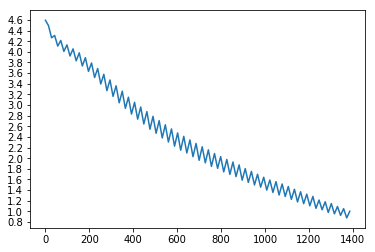

Losses diagram saved in TODO
Models and data saved in: encoder.pt, attn_decoder.pt, data_run

28 inputs constructed for testing ...

28 outputs predicted ...

Predictions written to ../output/toy.preprocessed-test.predicted.postprocessed.en
Blue score written to ../output/toy.preprocessed-test.BLEU
un pe@@ t@@ i@@ t j@@ et bl@@ an@@ c d@@ é@@ c@@ ol@@ l@@ ant , avec de l&apos; eau sur le c@@ ô@@ t@@ é . EOS
un petit jet blanc décollant , avec de l&apos; eau sur le côté . EOS
a w@@ om@@ an w@@ al@@ k@@ ing o@@ f@@ f with water t@@ o the side . EOS
a woman walking off with water to the side . EOS


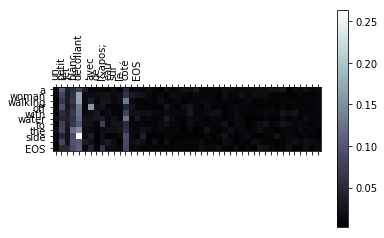

une re@@ m@@ or@@ qu@@ e en bo@@ is à qu@@ at@@ r@@ e r@@ ou@@ es g@@ ar@@ é@@ e sur une pl@@ at@@ e@@ for@@ me en bo@@ is . EOS
une remorque en bois à quatre roues garée sur une plateforme en bois . EOS
a w@@ om@@ an w@@ al@@ k@@ ing in the c@@ it@@ y EOS
a woman walking in the city EOS


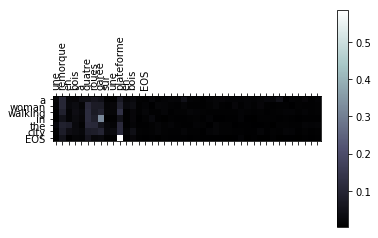

un h@@ om@@ me en p@@ an@@ t@@ al@@ on ra@@ y@@ é f@@ a@@ i@@ t un c@@ on@@ c@@ er@@ t . EOS
un homme en pantalon rayé fait un concert . EOS
a m@@ an and a w@@ om@@ an w@@ al@@ k@@ ing in the c@@ it@@ y EOS
a man and a woman walking in the city EOS


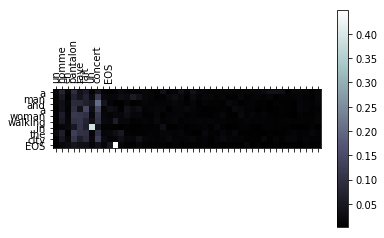

Attention diagrams saved in TODO


In [23]:
#### TOY DATA

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_epochs = 50
max_hours = 9
clip = 10

MAX_LENGTH = 24
(encoder, attn_decoder, slang, tlang, plot_losses, max_bpe_length) = pipeline.run(
    fp.spath_toy, fp.tpath_toy, 
    fp.spath_toy, fp.tpath_toy, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = False, 
    use_bpe = True, num_operations = 80, vocab_threshold = 1,
    padding = False)


In [21]:
plot_every = math.floor(n_epochs * 28/500)
plot_every
len(plot_losses)

700

In [ ]:
#### TUTORIAL DATA - no BPE

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 75000
max_hours = 2


MAX_LENGTH = 10
(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_tutorial, fp.tpath_tutorial, 
    fp.spath_tutorial, fp.tpath_tutorial, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = False, 
    use_bpe = False, num_operations = 200, vocab_threshold = 2,
    padding = False)

In [ ]:
#### TUTORIAL DATA

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 75000
max_hours = 9


MAX_LENGTH = 10
(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_tutorial, fp.tpath_tutorial, 
    fp.spath_tutorial, fp.tpath_tutorial, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = False, 
    use_bpe = True, num_operations = 200, vocab_threshold = 2,
    padding = False)


In [ ]:
#### TRAIN and TEST DATA using BPE

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_epochs = 15
max_hours = 10
clip = 8
use_bpe = True
replace_unknown_words = True
padding = False
MAX_LENGTH = 17
plot_every = 100

(encoder, attn_decoder, slang, tlang, plot_losses, max_bpe_length) = pipeline.run(
    fp.spath_train, fp.tpath_train, 
    fp.spath_val, fp.tpath_val, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = True, 
    use_bpe = True, num_operations = 400, vocab_threshold = 5, 
    padding = False)


In [ ]:
#### TRAIN and TEST DATA no BPE

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 80000
max_hours = 8

MAX_LENGTH = 25
(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_train, fp.tpath_train, 
    fp.spath_test, fp.tpath_test, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = True, 
    use_bpe = False, 
    padding = False)


In [ ]:
import filepaths as fp
import data_preparation as dp

from plots import showLosses, showAttention
from data_processing import preprocess, postprocess

def sanity_check(spath_train, tpath_train, 
        spath_test, tpath_test, 
        fn_train, fn_predict_all,
        max_sentence_length = 50, 
        replace_unknown_words = True, 
        use_bpe = True, num_operations = 400, vocab_threshold = 5,
        padding = True):

    # data preprocessing
    (spath_train_pp, tpath_train_pp, spath_test_pp, tpath_test_pp) = preprocess(
        spath_train, tpath_train, spath_test, tpath_test, 
        max_sentence_length,
        replace_unknown_words, 
        use_bpe, num_operations, vocab_threshold)

    print (f'Data files preprocessed ...')
    print ()
    
    # data structures for training
    (slang, tlang, index_array_pairs, s_index_arrays_test, max_bpe_length) = dp.prepare_data(
        spath_train_pp, tpath_train_pp, spath_test_pp, padding)
        
    return slang, tlang, index_array_pairs, max_bpe_length



In [ ]:
hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 300000
max_hours = 10
clip = 8
use_bpe = True
replace_unknown_words = True
padding = False


MAX_LENGTH = 17
slang, tlang, index_array_pairs, max_bpe_length = sanity_check(
    fp.spath_train, fp.tpath_train, 
    fp.spath_test, fp.tpath_test, 
    sanity_ckeck, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = replace_unknown_words, 
    use_bpe = use_bpe, 
    padding = padding)


In [ ]:
for i in [0,1, 10000, 20000, 28317, 28318]:
    print(dp.sentenceFromIndexes(slang, index_array_pairs[i][0]))
    print(dp.sentenceFromIndexes(tlang, index_array_pairs[i][1]))
    print()

In [4]:
#encoder, attn_decoder, slang, tlang

EncoderRNN(
  (embedding): Embedding(114, 256)
  (gru): GRU(256, 256)
)

In [128]:
import data_preparation as dp

s_sentence = 'une a@@ b@@ e@@ il@@ le pl@@ an@@ ant a@@ u@@ -@@ de@@ s@@ su@@ s de f@@ l@@ e@@ ur@@ s v@@ i@@ ol@@ e@@ t@@ t@@ es et or@@ an@@ g@@ es .'
s_words = s_sentence.split(' ')
s_indices = dp.indexesFromSentence(
    slang, 
    s_sentence
)

t, a = predict(
        encoder, attn_decoder, s_indices, max_bpe_length)

t_words = dp.wordsFromIndexes(tlang,t)
A = a.numpy() # 19 output * 60 input

In [97]:
s_sentence.replace('@@ ', '')

'une abeille planant au-dessus de fleurs violettes et oranges .'

In [130]:
import numpy as np

merge_indices = [i for i, w in enumerate(s_words) if w.endswith('@@')]
resulting_columns = []
merge_column = np.array([])
resulting_words = []
merge_word = ''
for i, column in enumerate(A.T):
    if not merge_column.any():
        merge_column = column
        merge_word = s_words[i] if i < len(s_words) else ''
    else:
        merge_column = (merge_column + column)
        merge_word += s_words[i]
    if i not in merge_indices:
        resulting_words.append(merge_word)
        resulting_columns.append(merge_column)
        merge_column = np.array([])

In [131]:
resulting_words

['une',
 'a@@b@@e@@il@@le',
 'pl@@an@@ant',
 'a@@u@@-@@de@@s@@su@@s',
 'de',
 'f@@l@@e@@ur@@s',
 'v@@i@@ol@@e@@t@@t@@es',
 'et',
 'or@@an@@g@@es',
 '.',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [132]:
X = np.column_stack(resulting_columns)
X.shape

(19, 35)

In [133]:
merge_indices = [i for i, w in enumerate(t_words) if w.endswith('@@')]
resulting_rows = []
merge_row = np.array([])
resulting_words = []
merge_word = ''
for i, row in enumerate(X):
    if not merge_row.any():
        merge_row = row
        merge_word = t_words[i] if i < len(t_words) else ''
    else:
        merge_row = (merge_row + row)/2.
        merge_word += t_words[i]
    if i not in merge_indices:
        resulting_words.append(merge_word)
        resulting_rows.append(merge_row)
        merge_row = np.array([])

In [134]:
len(resulting_rows)

9

In [135]:
resulting_words

['a',
 'wat@@er@@f@@all',
 'in',
 'a',
 'for@@e@@s@@t',
 'with',
 'm@@an@@y',
 't@@re@@es',
 'EOS']

In [137]:
sum(resulting_rows[5])

0.999999986961484

In [ ]:
resulting_rows = []
merge_row = np.array([])
for i, row in enumerate(A):
    if i > len(merge_indices):
        break    
    if not merge_column.any():
        merge_column = column
    else:
        merge_column = (merge_column + column)/2.
    if i not in merge_indices:
        resulting_columns.append(merge_column)
        merge_column = np.array([])

In [139]:
mj = np.column_stack(resulting_columns)

In [140]:
mj.shape

(19, 35)

In [142]:
sum(mj[5])

1.0000000128056854

In [147]:
def merge_bpe_s(s_words, A):
    merge_indices = [i for i, w in enumerate(s_words) if w.endswith('@@')]
    resulting_columns = []
    merge_column = np.array([])
    resulting_words = []
    merge_word = ''
    for i, column in enumerate(A.T):
        if not merge_column.any():
            merge_column = column
            merge_word = s_words[i] if i < len(s_words) else ''
        else:
            merge_column = (merge_column + column)
            merge_word += s_words[i]
        if i not in merge_indices:
            resulting_words.append(merge_word)
            resulting_columns.append(merge_column)
            merge_column = np.array([])
    return resulting_words, np.column_stack(resulting_columns)
        
def merge_bpe_t(t_words, X):
    merge_indices = [i for i, w in enumerate(t_words) if w.endswith('@@')]
    resulting_rows = []
    merge_row = np.array([])
    resulting_words = []
    merge_word = ''
    for i, row in enumerate(X):
        if not merge_row.any():
            merge_row = row
            merge_word = t_words[i] if i < len(t_words) else ''
        else:
            merge_row = (merge_row + row)/2.
            merge_word += t_words[i]
        if i not in merge_indices:
            resulting_words.append(merge_word)
            resulting_rows.append(merge_row)
            merge_row = np.array([])
    return resulting_words, np.row_stack(resulting_rows)
        
def merge_bpe(s_words, output_w, a):
    s_words_merged, X = merge_bpe_s(s_words, A)
    t_words_merged, attentions = merge_bpe_t(t_words, X)
    return (s_words_merged, t_words_merged, attentions)

q,r,s = merge_bpe(s_words, t_words, A)

In [153]:
len(q)

35

In [156]:
sum(s[0])

1.000000053900294

In [13]:
#from itertools import chain
chain(encoder.parameters(), attn_decoder.parameters())

<generator object chain at 0x7fb5ecfcd0a0>

In [10]:
def xchain(*iterables):
    # chain('ABC', 'DEF') --> A B C D E F
    for it in iterables:
        for element in it:
            yield element

In [12]:
encoder.parameters()

<generator object Module.parameters at 0x7fb5ecfcd728>

In [7]:
import math
math.ceil(1.2)

2